In [491]:
import numpy as np
from numpy.linalg import multi_dot
from scipy.linalg import norm
import matplotlib.pyplot as plt
%run -i rn_cu_gadget.py
%run -i helper.py

In [492]:
reps = 200
D00 = {(0,0,0):1}
D01 = {(0,0,0):0, (0,0,1):1}
D10 = {(0,0,0):0, (0,1,0):1}
D11 = {(0,0,0):0, (0,1,1):1}

In [498]:
nflags=1000
flag = 0
q1 = 1
q2 = 2
probs = np.linspace(0,0.015,150)

In [499]:
def generate_plot_data(nflags, n, flag, q1, q2, probs, randuflag=False):
    rej_prop_all = []
    res_all = []
    rej_all = []
    
    res_temp = []
    rej_temp = []
    x_res = []
    x_rej = []
    for p in probs:
        print(p,end='\r')
        res, rej, rej_prop = flag_fid(nflags, n, flag, q1, q2, p, randuflag)
        rej_prop_all.append(rej_prop)
        res_temp += res
        rej_temp += rej
        x_res += [p]*len(res)
        x_rej += [p]*len(rej)
        #res_all.append(np.average(res))
        #rej_all.append(np.average(rej))
    
    #return res_all, rej_all, rej_prop_all
    return [x_res, res_temp], [x_rej, rej_temp], rej_prop_all

In [523]:
n=2
res_n2_pauli, rej_n2_pauli, rej_prop_n2_pauli = generate_plot_data(nflags, n, flag, q1, q2, probs, randuflag=False)
res_n2_u, rej_n2_u, rej_prop_n2_u = generate_plot_data(nflags, n, flag, q1, q2, probs, randuflag=True)

Failed to find a square root.
Failed to find a square root.


1

0.37882452263537236 0.21897773773940457


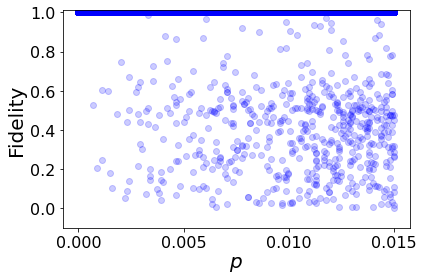

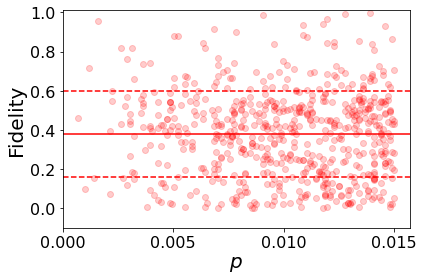

In [543]:
plt.figure(1)
plt.scatter(res_n2_pauli[0],res_n2_pauli[1], alpha=0.2, color='blue')
plt.ylim([-0.1,1.01])
plt.xticks([0, 0.005, 0.010, 0.015],fontsize=16)
plt.xlabel(r'$p$', fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel('Fidelity', fontsize=20)
plt.tight_layout()
plt.savefig('plots/rn2_res_pauli.png')

plt.figure(2)
plt.scatter(rej_n2_pauli[0],rej_n2_pauli[1], alpha=0.2, color='red')
n2_pauli_avg = np.average(rej_n2_pauli[1])
n2_pauli_std = np.std(rej_n2_pauli[1])
print(n2_pauli_avg,n2_pauli_std)
plt.axhline(y=n2_pauli_avg, color='red')
plt.axhline(y=n2_pauli_avg+n2_pauli_std, color='red', ls='--')
plt.axhline(y=n2_pauli_avg-n2_pauli_std, color='red', ls='--')
plt.ylim([-0.1,1.01])
plt.xticks([0, 0.005, 0.010, 0.015],fontsize=16)
plt.xlabel(r'$p$', fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel('Fidelity', fontsize=20)
plt.tight_layout()
plt.savefig('plots/rn2_rej_pauli.png')

#plt.scatter(probs, res_n1_pauli, alpha=)
#plt.plot(probs, rej_n1_pauli)


0.4011436162186799 0.18258883194365566


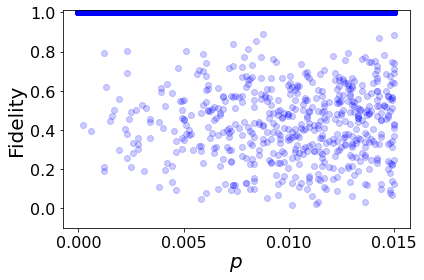

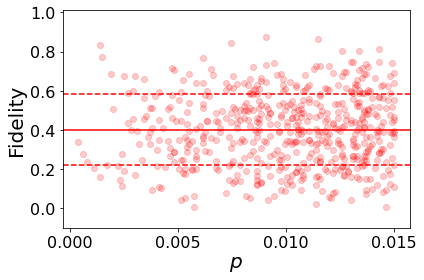

In [544]:
plt.figure(1)
plt.scatter(res_n2_u[0],res_n2_u[1], alpha=0.2, color='blue')
plt.ylim([-0.1,1.01])
plt.xticks([0, 0.005, 0.010, 0.015],fontsize=16)
plt.xlabel(r'$p$', fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel('Fidelity', fontsize=20)
plt.tight_layout()
plt.savefig('plots/rn2_res_u.png')


plt.figure(2)
plt.scatter(rej_n2_u[0],rej_n2_u[1], alpha=0.2, color='red')
n2_u_avg = np.average(rej_n2_u[1])
n2_u_std = np.std(rej_n2_u[1])
print(n2_u_avg,n2_u_std)
plt.axhline(y=n2_u_avg, color='red')
plt.axhline(y=n2_u_avg+n2_u_std, color='red', ls='--')
plt.axhline(y=n2_u_avg-n2_u_std, color='red', ls='--')
plt.ylim([-0.1,1.01])
plt.xticks([0, 0.005, 0.010, 0.015],fontsize=16)
plt.xlabel(r'$p$', fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel('Fidelity', fontsize=20)
plt.tight_layout()
plt.savefig('plots/rn2_rej_u.png')
